# HR Analytics -> Employees Engagement

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv("HRDataset_v14.csv")
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [114]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [115]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [116]:
df.shape

(311, 36)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# cleaning the data 


In [118]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [119]:
### Actually this will be decided by the bussiness team 
df.fillna("0",inplace = True)  

In [120]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [121]:
df.duplicated().sum()

0

In [122]:
df.drop_duplicates(inplace= True)

In [123]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### EDA

#### Employees with higest salary ->> Top 10 highest employee salary

In [124]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [125]:
df["Salary"].sort_values(ascending = False).head(10)


150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [126]:
df["PerformanceScore"] # pip -> pefromance improvement plan 

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [127]:
# Employees who need special attention 
# perfromance Improvement Plan 

df.PerformanceScore.unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [128]:
df[df.PerformanceScore == "PIP"]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
67,"Delarge, Alex",10306,0,0,1,1,6,1,0,61568,...,John Smith,17.0,Indeed,PIP,1.93,3,0,1/30/2019,6,5
69,"Desimone, Carl",10310,1,1,1,1,5,1,0,53189,...,Amy Dunn,11.0,Indeed,PIP,1.12,2,0,1/31/2019,4,9
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.30,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.00,1,0,2/25/2019,2,5
90,"Fernandes, Nilson",10308,1,1,1,1,5,1,0,64057,...,Amy Dunn,11.0,Indeed,PIP,1.56,5,0,1/3/2019,6,15
91,"Fett, Boba",10309,0,0,1,1,3,1,0,53366,...,Peter Monroe,7.0,LinkedIn,PIP,1.20,3,6,2/4/2019,3,2
95,"Forrest, Alex",10305,1,1,1,1,6,3,0,70187,...,Lynn Daneault,21.0,Employee Referral,PIP,2.00,5,0,1/28/2019,4,7
112,"Gonzalez, Juan",10300,1,1,1,5,5,1,1,68898,...,Brannon Miller,12.0,Diversity Job Fair,PIP,3.00,3,0,3/6/2011,3,10
188,"Miller, Ned",10298,0,0,1,5,5,1,0,55800,...,Brannon Miller,12.0,LinkedIn,PIP,3.00,2,0,1/14/2013,6,6
205,"O'hare, Lynn",10303,0,0,0,4,5,1,0,52674,...,Kissy Sullivan,20.0,LinkedIn,PIP,2.33,2,0,3/9/2018,6,3


In [129]:
df[df.PerformanceScore == "PIP"].Employee_Name

67           Delarge, Alex
69         Desimone, Carl 
72       Dietrich, Jenna  
83          Erilus, Angela
90     Fernandes, Nilson  
91              Fett, Boba
95           Forrest, Alex
112         Gonzalez, Juan
188            Miller, Ned
205           O'hare, Lynn
263       Sparks, Taylor  
267     Stansfield, Norman
307     Ybarra, Catherine 
Name: Employee_Name, dtype: object

In [130]:
len(df[df.PerformanceScore == "PIP"].Employee_Name)

13

In [131]:
# No. of absences 


df.Absences.value_counts()

Absences
4     23
16    23
7     21
2     21
15    20
13    17
14    17
3     16
19    16
6     16
11    15
17    15
1     14
20    14
9     14
5     12
8     11
10    10
12     8
18     8
Name: count, dtype: int64

In [132]:
df.Absences.value_counts(normalize = True)*100

Absences
4     7.395498
16    7.395498
7     6.752412
2     6.752412
15    6.430868
13    5.466238
14    5.466238
3     5.144695
19    5.144695
6     5.144695
11    4.823151
17    4.823151
1     4.501608
20    4.501608
9     4.501608
5     3.858521
8     3.536977
10    3.215434
12    2.572347
18    2.572347
Name: proportion, dtype: float64

### insights -> highest no of leaves taken is 20 by 4.5 percent of employee

In [133]:
# Whether employee are marries or not 


df["MarriedID"].value_counts()

MarriedID
0    187
1    124
Name: count, dtype: int64

### insights -> 187 employee are married 

In [134]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [135]:
df["SpecialProjectsCount"].value_counts()

SpecialProjectsCount
0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: count, dtype: int64

In [136]:
 df[df["SpecialProjectsCount"]!=0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,...,Brian Champaigne,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17
299,"Warfield, Sarah",10127,0,4,0,1,3,3,0,107226,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.20,4,8,2/5/2019,0,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


### insight -> 70 employee doesn't have any special project 

In [137]:
df["SpecialProjectsCount"].sort_values(ascending = False)

61     8
299    8
243    7
254    7
25     7
      ..
126    0
127    0
128    0
129    0
310    0
Name: SpecialProjectsCount, Length: 311, dtype: int64

In [138]:
df[df["SpecialProjectsCount"]==0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4


In [139]:
# visualization 
# highest salary vs lowest salary



In [140]:
df.Salary.sort_values(ascending = False)

150    250000
308    220450
131    180000
96     178000
55     170500
        ...  
152     45433
176     45395
231     45115
140     45069
310     45046
Name: Salary, Length: 311, dtype: int64

In [141]:
# higest 10 salary 
df.Salary.sort_values(ascending = False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [142]:
# lowest 10 salary 
df.Salary.sort_values(ascending = False).tail(10)

226    46430
247    46428
74     46335
159    46120
216    45998
152    45433
176    45395
231    45115
140    45069
310    45046
Name: Salary, dtype: int64

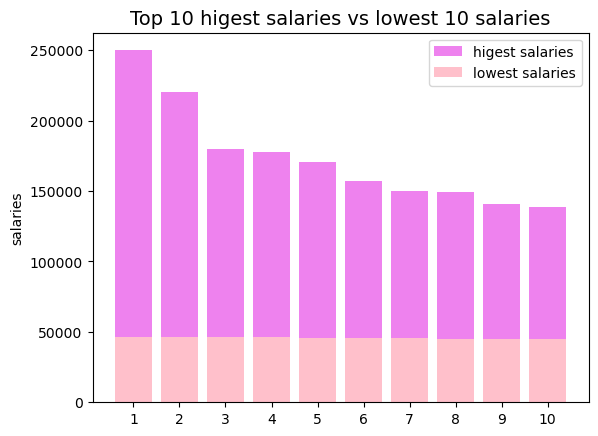

In [143]:
c = [1,2,3,4,5,6,7,8,9,10]
y1 = df.Salary.sort_values(ascending = False).head(10)
y2 = df.Salary.sort_values(ascending = False).tail(10)
plt.bar(c , y1 ,color = 'violet',label = 'higest salaries')
plt.bar(c , y2 ,color = 'pink',label = 'lowest salaries')

plt.title("Top 10 higest salaries vs lowest 10 salaries" , fontsize = 14)

plt.xticks(c)
plt.ylabel("salaries")
plt.legend()
plt.show()

#### insights -> 
#### lowest salary are very  close to each other 
#### higest salary varies a lot 

In [144]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [145]:
df.RecruitmentSource

0               LinkedIn
1                 Indeed
2               LinkedIn
3                 Indeed
4          Google Search
             ...        
306             LinkedIn
307        Google Search
308    Employee Referral
309    Employee Referral
310             LinkedIn
Name: RecruitmentSource, Length: 311, dtype: object

In [146]:
df.RecruitmentSource.unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [147]:
l = df.RecruitmentSource.value_counts()
l

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

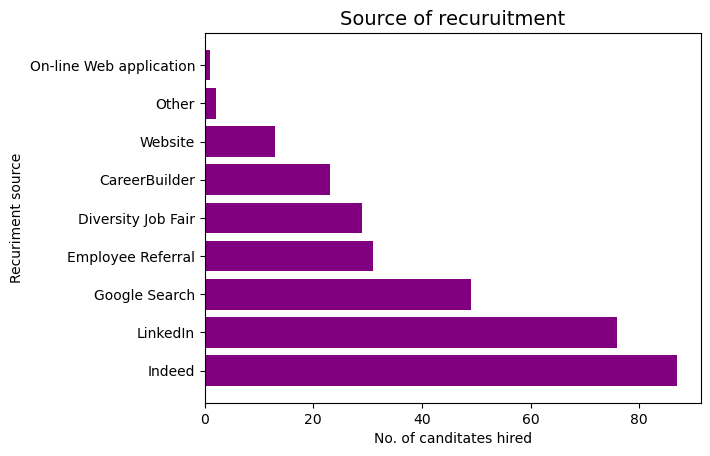

In [148]:
plt.barh(l.index,l , color = 'purple')
plt.title("Source of recuruitment" , fontsize = 14)
plt.xlabel("No. of canditates hired")
plt.ylabel("Recuriment source")
plt.show()

#### insights -> indded is the most common platform followed by linked , google search

In [149]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [150]:
df.PerformanceScore

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [151]:
z = df.PerformanceScore.value_counts()
z

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

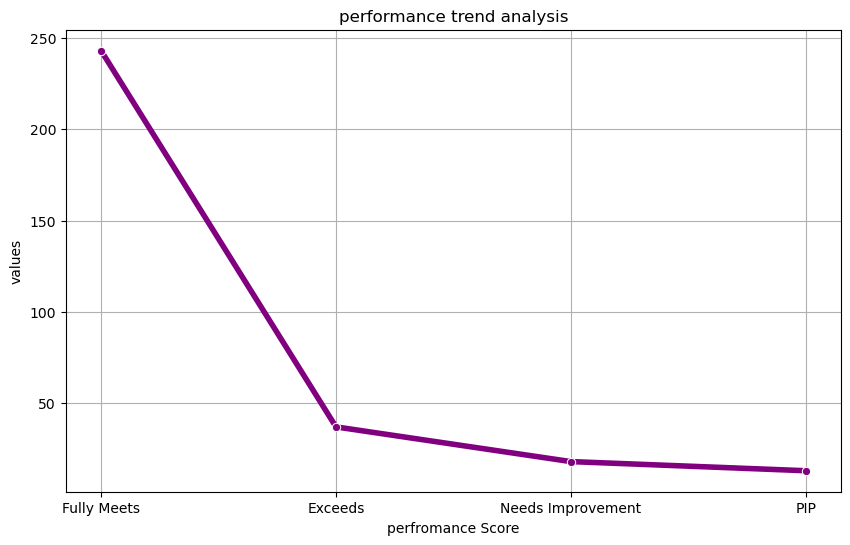

In [152]:
plt.figure(figsize = (10,6))
sns.lineplot(data = z, marker  = "o", color = 'purple',linewidth = 4)

plt.title("performance trend analysis")
plt.xlabel("perfromance Score")
plt.ylabel('values')
plt.grid()
plt.show()

### insights -> generally trend is increasing --> mostly the score 50 - 250

In [153]:
df.EmpSatisfaction  # scale of 1-5

0      5
1      3
2      3
3      5
4      4
      ..
306    4
307    2
308    5
309    3
310    5
Name: EmpSatisfaction, Length: 311, dtype: int64

In [154]:
df.EmpSatisfaction.value_counts()

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

In [155]:
b=df.EmpSatisfaction.value_counts()
b

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

### Stem Plot 
- each stem (vertical line) represents the employee satisfaction level for each group

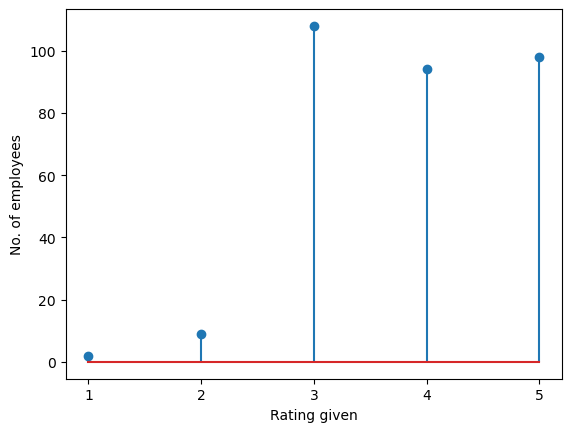

In [156]:
plt.stem(b.index,b)
plt.ylabel("No. of employees")
plt.xlabel("Rating given")
plt.xticks(b.index)
plt.show()

### insights -> the most common rating is 3 



# Multivariate Analysis

In [157]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

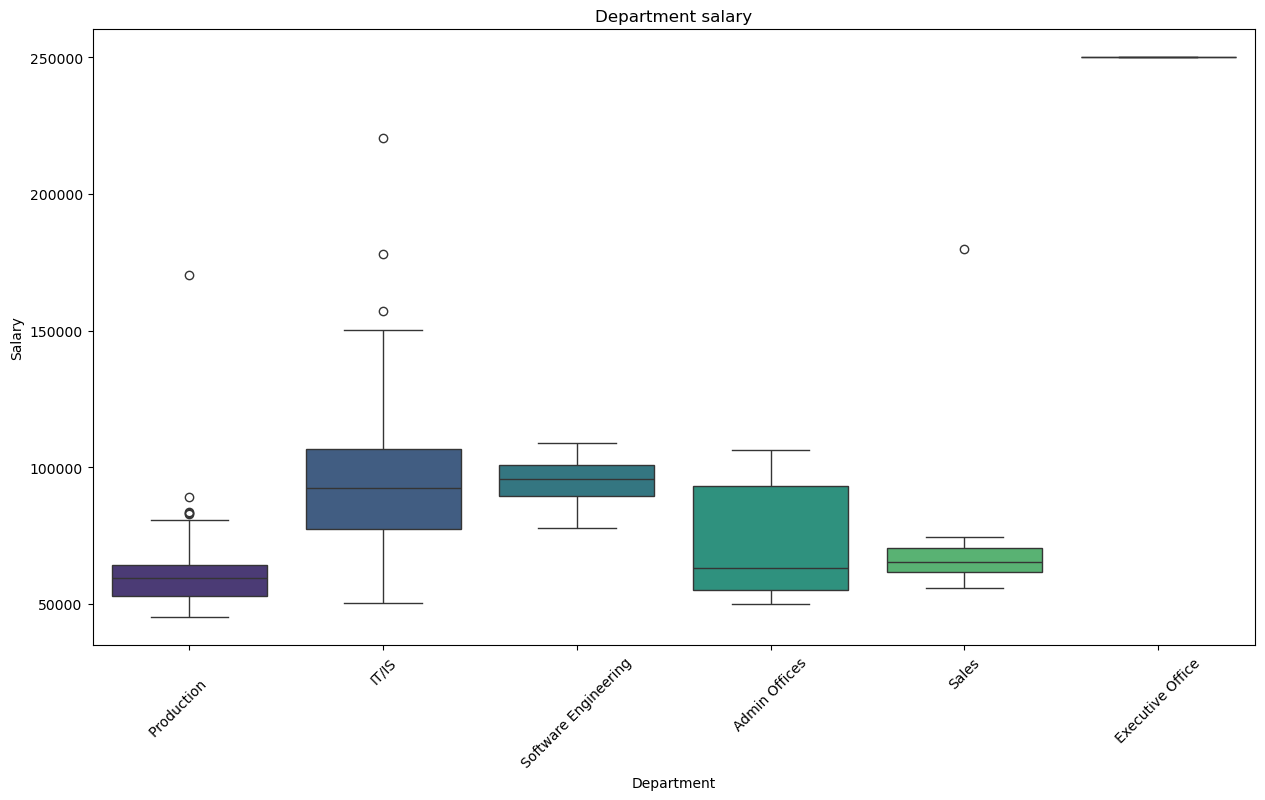

In [158]:
##### Outliers in salary column with respect to each departemnt


plt.figure(figsize = (15,8))
sns.boxplot(x = 'Department' , y='Salary' , data = df , palette = 'viridis')
plt.title("Department salary")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation = 45)
plt.show()

### insights ->
- executive are paid highest 
- Least salary in production 
- outliers are prsent in few of the columns 

In [159]:
# for different positon plot the engagement Survey


df.Position

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

In [160]:
df.EngagementSurvey

0      4.60
1      4.96
2      3.02
3      4.84
4      5.00
       ... 
306    4.07
307    3.20
308    4.60
309    5.00
310    4.50
Name: EngagementSurvey, Length: 311, dtype: float64

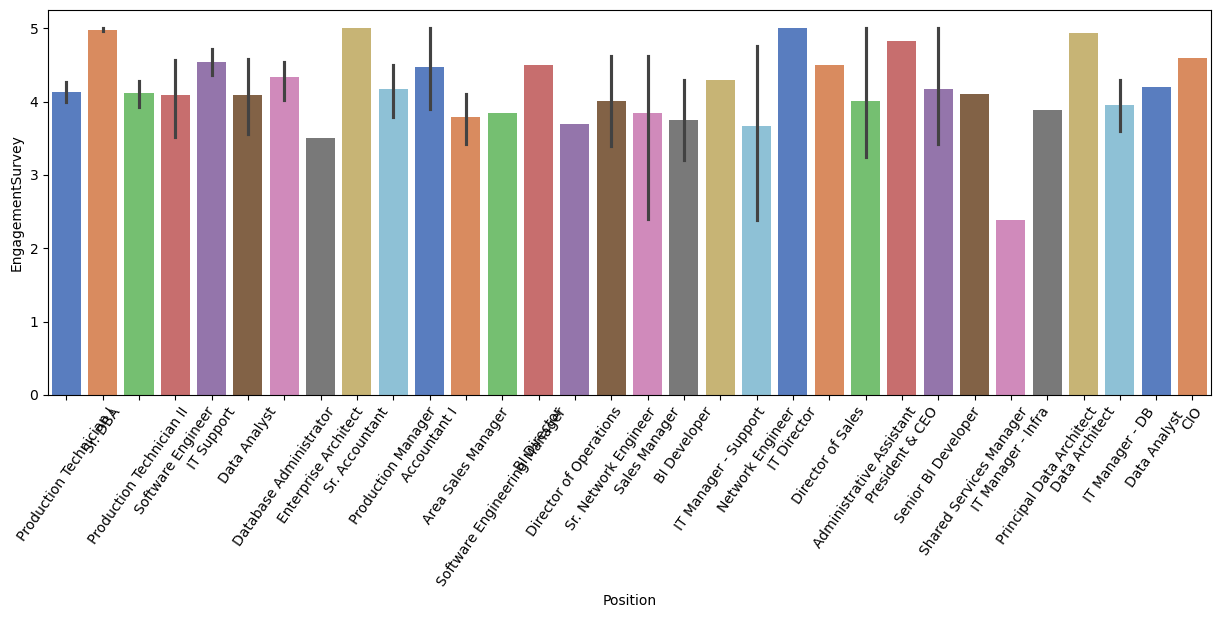

In [161]:
plt.figure(figsize =(15,5) )
sns.barplot(x = 'Position' , y = 'EngagementSurvey', data = df, palette = 'muted')
plt.xticks(rotation = 55)
plt.show()

<Axes: xlabel='MaritalDesc', ylabel='count'>

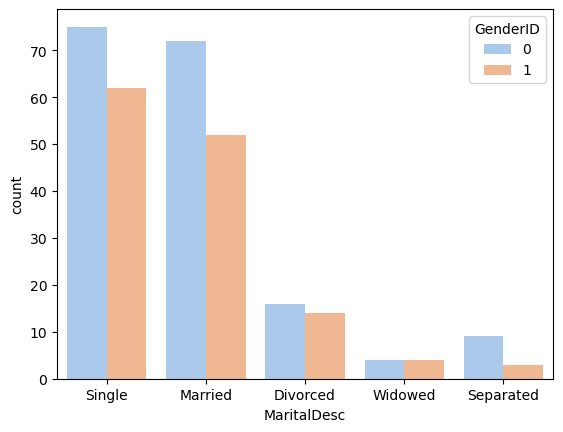

In [162]:
# Marital status by gender
sns.countplot(x = 'MaritalDesc', hue= "GenderID", data = df,palette = 'pastel')

#### Insights -> most of the males are single 
#### - males are more separated

### What is the avg enagement score for employee in each department

In [163]:
df.groupby("Department")["EngagementSurvey"].mean()

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64

#### insights -> Executive Office has the highest Engagement Survey

### Q1. How many employee have been terminated for each position 
### Q2. How many employee have been terminated for each reaason 



##### How many employee have been terminated for each position

In [164]:
df[df['Termd']==1]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [165]:
df[df['Termd']==1].groupby('Position')['Employee_Name'].count()

Position
Administrative Assistant     2
Area Sales Manager           4
Data Analyst                 1
Data Analyst                 1
Database Administrator       3
Enterprise Architect         1
IT Manager - DB              1
Network Engineer             1
Principal Data Architect     1
Production Manager           5
Production Technician I     52
Production Technician II    26
Sales Manager                1
Software Engineer            4
Sr. DBA                      1
Name: Employee_Name, dtype: int64

In [166]:
# How many employee have been terminated for each reaason


df[df['Termd']==1].groupby('TermReason')['Employee_Name'].count()

TermReason
Another position                    20
Fatal attraction                     1
Learned that he is a gangster        1
attendance                           7
career change                        9
gross misconduct                     1
hours                                8
maternity leave - did not return     3
medical issues                       3
military                             4
more money                          11
no-call, no-show                     4
performance                          4
relocation out of area               5
retiring                             4
return to school                     5
unhappy                             14
Name: Employee_Name, dtype: int64

In [167]:
# What is the median salary of male and female employee 

df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [168]:
df['Salary'].value_counts()

Salary
63025    2
57815    2
61242    2
66738    1
68829    1
        ..
51337    1
53171    1
52249    1
65707    1
45046    1
Name: count, Length: 308, dtype: int64

In [169]:
df.groupby('Sex')['Salary'].median()

Sex
F     62066.5
M     63353.0
Name: Salary, dtype: float64

In [170]:
# Total Absences and avg engagement survevy score for each department 

df.groupby('Department').agg({'Absences':'sum','EngagementSurvey':'mean'})

,Absences,EngagementSurvey
Department,,
Admin Offices,78,4.393333
Executive Office,10,4.830000
IT/IS,522,4.154000
Production,2120,4.129569
Sales,358,3.818710
Software Engineering,96,4.061818


In [171]:
# what is the total no. of special project and average absences for employee in each gender
df.groupby('Sex').agg({'Absences':'mean','SpecialProjectsCount':'sum'})



,Absences,SpecialProjectsCount
Sex,,
F,10.261364,183
M,10.207407,196


In [172]:
# What is maximum salary and minimum days Late in the last 30 days for employee in each position
## What is earliest and latest date of hire for employees in each manager's team ?
### how many terminated employees were there in each department and what is average employee satisfaction level in team

In [173]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [174]:
df.groupby('Position').agg({'Salary':'max','DaysLateLast30':'min'})

,Salary,DaysLateLast30
Position,,
Accountant I,64520,0
Administrative Assistant,55000,0
Area Sales Manager,74326,0
BI Developer,99020,0
BI Director,110929,0
CIO,220450,0
Data Analyst,93554,0
Data Analyst,88527,0
Data Architect,150290,0


In [175]:
df.groupby('ManagerName')['DateofHire'].agg(['min','max'])

,min,max
ManagerName,,
Alex Sweetwater,1/9/2012,7/7/2014
Amy Dunn,1/10/2011,9/29/2014
Board of Directors,1/5/2009,7/2/2012
Brandon R. LeBlanc,1/6/2014,9/29/2014
Brannon Miller,1/10/2011,9/2/2008
Brian Champaigne,1/7/2017,4/20/2017
David Stanley,1/10/2011,9/29/2014
Debra Houlihan,11/7/2011,5/5/2014
Elijiah Gray,1/10/2011,9/29/2014


In [176]:
df.groupby('Department').agg({'Termd':'sum','EmpSatisfaction':'mean'})

,Termd,EmpSatisfaction
Department,,
Admin Offices,2,3.555556
Executive Office,0,3.000000
IT/IS,10,3.960000
Production,83,3.861244
Sales,5,4.032258
Software Engineering,4,4.090909
